In [28]:

import matplotlib as plt
import json
import pandas as pd
from collections import Counter
from Module.ES_connector import ElasticsearchQuery

In [27]:
import requests
import json

# 定義 Elasticsearch 的 URL 和索引
url = "http://192.168.31.130:32327/game_data_aaa/_search"

# 查詢請求的主體
query = {
  "size" : 752,
  "query": {
    "match_all": {}
  }
}

# 發送請求到 Elasticsearch
response = requests.get(url, headers={"Content-Type": "application/json"}, data=json.dumps(query))

# 檢查回應狀態碼並顯示結果
if response.status_code == 200:
    result = response.json()
    
     # 以漂亮格式顯示 JSON 結果
else:
    print(f"Error: {response.status_code}")


Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x78c04772fbe0>>
Traceback (most recent call last):
  File "/usr/local/pyenv/versions/3.10.15/envs/dev310-da/lib/python3.10/site-packages/ipykernel/ipkernel.py", line 775, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(
KeyboardInterrupt: 


In [21]:
def tags_count_by_year(game_rawdata, target):
    games_data = []
    for i in range(len(game_rawdata)):
        game_obj = game_rawdata[i]["_source"]
        tags = game_obj[target]
        if game_obj["releaseDate"]:
            year = pd.to_datetime(game_obj["releaseDate"], unit='ms').year
        for tag in tags:
            games_data.append({'year': year, target: tag})
    df = pd.DataFrame(games_data)
    df = df.groupby(['year', target]).size().reset_index(name='count')
    pivot_df = df.pivot_table(index='year', columns=target, values='count', fill_value=0)
    return pivot_df

In [ ]:
def rm_f2p_tags_genres():
    pass

In [23]:

game_rawdata =result["hits"]["hits"] 
tags_count_by_year(game_rawdata, "tags")
df=tags_count_by_year(game_rawdata, "genres")
tags_count_by_year(game_rawdata, "features")
# df = df.drop(columns=['Early Access','Indie','Free To Play'])
df

genres,Action,Adventure,Casual,Early Access,Free To Play,Indie,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy
year,,,,,,,,,,,,
1998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2006,6.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0


In [24]:
import matplotlib.pyplot as plt

def plot_tag_rank(target, year):
    df = tags_count_by_year(game_rawdata, target)
    df = df.drop(columns=['Early Access','Indie','Free To Play'])
    year_series = df.loc[year].sort_values()
    # 繪製水平長條圖
    plt.figure(figsize=(10, 6))
    plt.barh(year_series.index, year_series.values, color='skyblue')

    # 添加標題和標籤
    plt.title(f'{target.capitalize()} Distribution in {year}', fontsize=16)
    plt.xlabel('Number of Games', fontsize=12)
    plt.ylabel(f'{target.capitalize()}', fontsize=12)

    # 顯示圖表
    plt.tight_layout()
    plt.show()
    return df
    

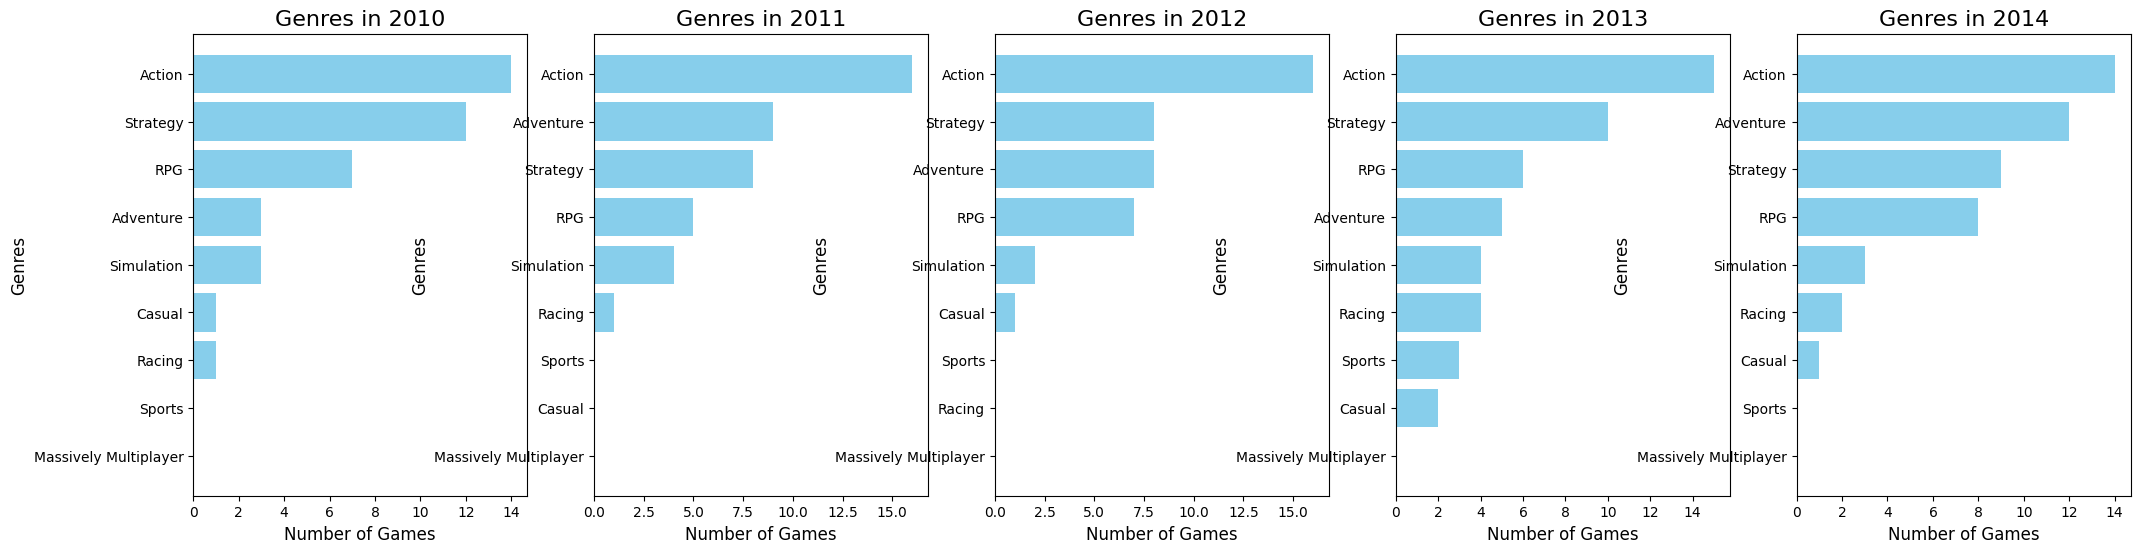

In [25]:
import matplotlib.pyplot as plt

# 創建一個畫布和子圖的框架，並設置子圖的數量
def create_plot_frame(num_plots):
    fig, axes = plt.subplots(1, num_plots, figsize=(num_plots * 5, 6))  # 1 行 num_plots 列的子圖
    return fig, axes

# 繪製一張子圖的函數，依次放入不同的子圖框架中
def plot_single_tag_rank(ax, target, year):
    df = tags_count_by_year(game_rawdata, target)
    df = df.drop(columns=['Early Access','Indie','Free To Play'])
    year_series = df.loc[year].sort_values()

    # 繪製水平長條圖到指定的子圖軸 ax
    ax.barh(year_series.index, year_series.values, color='skyblue')

    # 添加子圖的標題和標籤
    ax.set_title(f'{target.capitalize()} in {year}', fontsize=16)
    ax.set_xlabel('Number of Games', fontsize=12)
    ax.set_ylabel(f'{target.capitalize()}', fontsize=12)

# 設置畫布，假設我們想畫5個年份的圖
fig, axes = create_plot_frame(5)

# 分別呼叫函數來繪製每一個子圖
plot_single_tag_rank(axes[0], "genres", 2010)
plot_single_tag_rank(axes[1], "genres", 2011)
plot_single_tag_rank(axes[2], "genres", 2012)
plot_single_tag_rank(axes[3], "genres", 2013)
plot_single_tag_rank(axes[4], "genres", 2014)

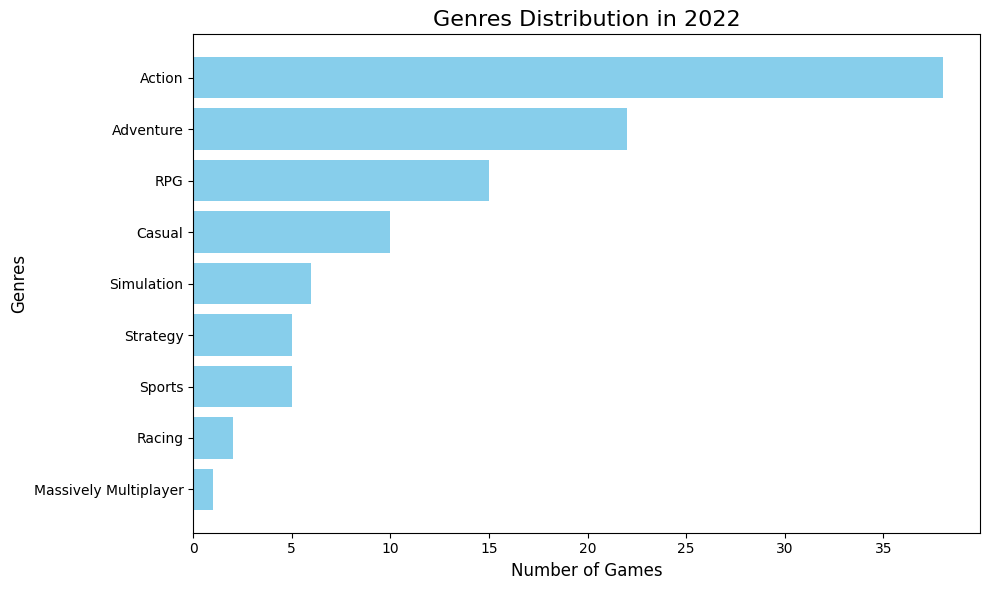

genres,Action,Adventure,Casual,Massively Multiplayer,RPG,Racing,Simulation,Sports,Strategy
year,,,,,,,,,
1998,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1999,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2001,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2002,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2003,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2004,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2005,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2006,6.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,3.0


In [26]:
plot_tag_rank('genres', 2022)

In [1]:
plot_tag_rank('genres', 2022)

NameError: name 'plot_tag_rank' is not defined